# Project 1 - Oregon Wildfire Data

In [101]:
import json
import requests
#from config import api_key
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [102]:
# Import weather data CSV

weather_data_path = "Adam/portland_weather_data_1.csv"
weather_data = pd.read_csv(weather_data_path)

weather_data

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
0,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2017-01-01,0.05,0.0,0.0,36,40,32
1,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2017-01-02,0.00,0.0,0.0,34,35,29
2,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2017-01-03,0.00,0.0,0.0,31,34,27
3,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2017-01-04,0.00,0.0,0.0,29,33,27
4,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2017-01-05,0.00,0.0,0.0,27,35,17
...,...,...,...,...,...,...,...,...,...,...,...,...
2186,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2022-12-27,1.21,0.0,0.0,47,55,44
2187,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2022-12-28,0.00,0.0,0.0,46,49,42
2188,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2022-12-29,0.53,0.0,0.0,44,45,42
2189,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2022-12-30,0.30,0.0,0.0,47,55,42


In [103]:
# Convert Date to Python datetime

weather_data_2 = weather_data.copy()

weather_data_2['DATE'] = pd.to_datetime(weather_data_2['DATE'])

weather_data_2

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
0,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2017-01-01,0.05,0.0,0.0,36,40,32
1,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2017-01-02,0.00,0.0,0.0,34,35,29
2,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2017-01-03,0.00,0.0,0.0,31,34,27
3,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2017-01-04,0.00,0.0,0.0,29,33,27
4,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2017-01-05,0.00,0.0,0.0,27,35,17
...,...,...,...,...,...,...,...,...,...,...,...,...
2186,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2022-12-27,1.21,0.0,0.0,47,55,44
2187,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2022-12-28,0.00,0.0,0.0,46,49,42
2188,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2022-12-29,0.53,0.0,0.0,44,45,42
2189,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2022-12-30,0.30,0.0,0.0,47,55,42


In [104]:
#read csv on wild fire data and create DataFrame
fire_data_path=("ODF_Fire_Occurrence_Data_2000-2022 (1).csv")
fire_data=pd.read_csv(fire_data_path)
fire_data.head()

,Serial,FireCategory,FireYear,Area,DistrictName,UnitName,FullFireNumber,FireName,Size_class,EstTotalAcres,...,Industrial_Restriction,Ign_DateTime,ReportDateTime,Discover_DateTime,Control_DateTime,CreationDate,ModifiedDate,DistrictCode,UnitCode,DistFireNumber
0,58256,STAT,2000,EOA,Central Oregon,John Day,00-952011-01,Slick Ear #2,B,0.75,...,Does Not Apply - Eastern OR,07/18/2000 07:00:00 PM,07/19/2000 01:20:00 PM,07/19/2000 01:15:00 PM,07/20/2000 12:50:00 AM,07/20/2000 09:13:00 AM,11/14/2000 09:16:00 AM,95,952,011
1,59312,STAT,2000,EOA,Northeast Oregon,La Grande,00-971024-01,Woodley,C,80.00,...,Does Not Apply - Eastern OR,08/24/2000 05:30:00 AM,08/24/2000 01:07:00 PM,08/24/2000 01:07:00 PM,09/01/2000 09:30:00 PM,08/29/2000 03:59:00 PM,12/21/2000 04:22:00 PM,97,971,024
2,61657,STAT,2001,SOA,Southwest Oregon,Grants Pass,01-712133-02,QUEENS BRANCH,A,0.10,...,Lvl 3 Restricted Shutdown,08/10/2001 05:40:00 PM,08/10/2001 05:47:00 PM,08/10/2001 05:45:00 PM,08/10/2001 06:30:00 PM,08/10/2001 06:42:00 PM,08/17/2001 11:45:00 AM,71,712,133
3,63735,STAT,2002,NOA,West Oregon,Philomath,02-551001-03,WREN,A,0.01,...,Lvl 1 Fire Season Only,07/06/2002 01:01:00 PM,07/06/2002 01:04:00 PM,07/06/2002 01:02:00 PM,07/06/2002 01:07:00 PM,07/07/2002 09:16:00 AM,07/28/2002 10:08:00 AM,55,551,001
4,68019,STAT,2003,NOA,West Oregon,Dallas,03-552013-04,Ritner Creek,A,0.01,...,Lvl 3 Restricted Shutdown,08/22/2003 04:00:00 AM,08/22/2003 05:00:00 AM,08/22/2003 05:00:00 AM,08/22/2003 09:30:00 AM,08/22/2003 04:12:00 PM,09/04/2003 09:39:00 AM,55,552,013


In [105]:
# Our project only wants to review data in the last 5 years.
#Create copy of original csv
fire_data2= fire_data.copy()


In [106]:
#limit the year to the last 5 years (2022-5=2017 or greater
#reduce dataframe to remove data prior to 2017
fire_data2.drop(fire_data2.loc[fire_data2["FireYear"]<2017].index, inplace=True)
fire_data2.head()

,Serial,FireCategory,FireYear,Area,DistrictName,UnitName,FullFireNumber,FireName,Size_class,EstTotalAcres,...,Industrial_Restriction,Ign_DateTime,ReportDateTime,Discover_DateTime,Control_DateTime,CreationDate,ModifiedDate,DistrictCode,UnitCode,DistFireNumber
40,109111,STAT,2017,NOA,Forest Grove,Forest Grove,17-531032-18,Raven's Ridge Fire,C,19.25,...,Lvl 2 Limited Shutdown,08/19/2017 03:35:00 PM,08/19/2017 03:40:00 PM,08/19/2017 03:37:00 PM,08/22/2017 05:00:00 PM,09/04/2017 12:00:00 AM,09/04/2017 02:01:00 PM,53,531,032
41,109245,STAT,2017,SOA,Southwest Oregon,Grants Pass,17-712536-18,Sykes Creek,B,0.50,...,Lvl 4 Complete Shutdown,09/07/2017 02:00:00 PM,09/07/2017 03:30:00 PM,09/07/2017 03:20:00 PM,09/13/2017 12:52:00 PM,09/08/2017 12:00:00 AM,09/26/2017 02:05:00 PM,71,712,536
42,106510,STAT,2017,SOA,Southwest Oregon,Grants Pass,17-712680-17,N Old Stage Road,A,0.01,...,Outside Closed Fire Season,05/30/2017 01:00:00 PM,05/30/2017 01:29:00 PM,05/30/2017 01:29:00 PM,06/02/2017 08:34:00 AM,05/30/2017 12:00:00 AM,06/05/2017 11:36:00 AM,71,712,680
43,109019,STAT,2017,SOA,Western Lane,Veneta,17-781047-18,Canary,A,0.01,...,Lvl 2 Limited Shutdown,09/01/2017 09:00:00 AM,09/01/2017 10:53:00 AM,09/01/2017 10:45:00 AM,09/01/2017 12:00:00 PM,09/01/2017 12:00:00 AM,09/01/2017 01:09:00 PM,78,781,047
44,108316,STAT,2017,EOA,Central Oregon,John Day,17-952032-18,Trent Creek,C,79.60,...,Does Not Apply - Eastern OR,08/10/2017 06:45:00 PM,08/10/2017 07:13:00 PM,08/10/2017 07:10:00 PM,08/16/2017 03:00:00 PM,08/10/2017 12:00:00 AM,09/03/2017 10:47:00 AM,95,952,032


In [107]:
#export fire data as csv
#fire_data2.to_csv("../Wildfires-OR-17.22.csv", index_label="fire_data2")

In [108]:
fire_data2['Control_DateTime'] = pd.to_datetime(fire_data2['Control_DateTime'])
fire_data2['Ign_DateTime']=pd.to_datetime(fire_data2['Ign_DateTime'])

C:\Users\dmrop\AppData\Local\Temp\ipykernel_22272\591089302.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fire_data2['Control_DateTime'] = pd.to_datetime(fire_data2['Control_DateTime'])
C:\Users\dmrop\AppData\Local\Temp\ipykernel_22272\591089302.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fire_data2['Ign_DateTime']=pd.to_datetime(fire_data2['Ign_DateTime'])


In [109]:
#Group District Name as index for data
district_index = fire_data2.set_index(["DistrictName",])
#create dataframe
county_data=pd.DataFrame({"County": fire_data2["County"],
                          "Year": fire_data2["FireYear"],
                          "Fire Name": fire_data2["FireName"],
                          "Acres" : fire_data2["EstTotalAcres"],
                          "Cause of Fire": fire_data2["SpecificCause"]})

county_data

,County,Year,Fire Name,Acres,Cause of Fire
40,Washington,2017,Raven's Ridge Fire,19.25,NaN
41,Jackson,2017,Sykes Creek,0.50,Lightning
42,Josephine,2017,N Old Stage Road,0.01,Warming Fire
43,Lane,2017,Canary,0.01,Warming Fire
44,Wheeler,2017,Trent Creek,79.60,Lightning
...,...,...,...,...,...
23485,Klamath,2021,Road 2430,0.75,Heat from Vehicle Manifold or Exhaust
23486,Lane,2022,Spruce Path,0.01,"Campfire Left Unattended (camp site, cooking)"
23487,Umatilla,2021,Bone Canyon,67.43,Lightning
23488,Umatilla,2022,Milepost 231,0.10,Burning Vehicle or Equipment


In [110]:
fire_data3 = fire_data2.copy() # https://datascienceparichay.com/article/remove-time-from-date-pandas/
fire_data3["DATE"] = fire_data3["Ign_DateTime"].dt.date
fire_data3["DATE"] = pd.to_datetime(fire_data3["DATE"])
fire_data3

,Serial,FireCategory,FireYear,Area,DistrictName,UnitName,FullFireNumber,FireName,Size_class,EstTotalAcres,...,Ign_DateTime,ReportDateTime,Discover_DateTime,Control_DateTime,CreationDate,ModifiedDate,DistrictCode,UnitCode,DistFireNumber,DATE
40,109111,STAT,2017,NOA,Forest Grove,Forest Grove,17-531032-18,Raven's Ridge Fire,C,19.25,...,2017-08-19 15:35:00,08/19/2017 03:40:00 PM,08/19/2017 03:37:00 PM,2017-08-22 17:00:00,09/04/2017 12:00:00 AM,09/04/2017 02:01:00 PM,53,531,032,2017-08-19
41,109245,STAT,2017,SOA,Southwest Oregon,Grants Pass,17-712536-18,Sykes Creek,B,0.50,...,2017-09-07 14:00:00,09/07/2017 03:30:00 PM,09/07/2017 03:20:00 PM,2017-09-13 12:52:00,09/08/2017 12:00:00 AM,09/26/2017 02:05:00 PM,71,712,536,2017-09-07
42,106510,STAT,2017,SOA,Southwest Oregon,Grants Pass,17-712680-17,N Old Stage Road,A,0.01,...,2017-05-30 13:00:00,05/30/2017 01:29:00 PM,05/30/2017 01:29:00 PM,2017-06-02 08:34:00,05/30/2017 12:00:00 AM,06/05/2017 11:36:00 AM,71,712,680,2017-05-30
43,109019,STAT,2017,SOA,Western Lane,Veneta,17-781047-18,Canary,A,0.01,...,2017-09-01 09:00:00,09/01/2017 10:53:00 AM,09/01/2017 10:45:00 AM,2017-09-01 12:00:00,09/01/2017 12:00:00 AM,09/01/2017 01:09:00 PM,78,781,047,2017-09-01
44,108316,STAT,2017,EOA,Central Oregon,John Day,17-952032-18,Trent Creek,C,79.60,...,2017-08-10 18:45:00,08/10/2017 07:13:00 PM,08/10/2017 07:10:00 PM,2017-08-16 15:00:00,08/10/2017 12:00:00 AM,09/03/2017 10:47:00 AM,95,952,032,2017-08-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,124548,STAT,2021,EOA,Walker Range - WRFPA,Crescent,21-991258-21,Road 2430,B,0.75,...,2021-06-26 16:00:00,06/26/2021 04:58:00 PM,06/26/2021 04:45:00 PM,2021-06-26 21:58:00,07/01/2021 12:00:00 AM,10/02/2021 03:08:00 PM,99,991,258,2021-06-26
23486,132141,STAT,2022,SOA,Western Lane,Veneta,22-781066-23,Spruce Path,A,0.01,...,2022-09-13 11:20:00,09/13/2022 11:20:00 AM,09/13/2022 11:20:00 AM,2022-09-13 12:14:00,09/13/2022 12:00:00 AM,09/19/2022 10:09:00 AM,78,781,066,2022-09-13
23487,124065,STAT,2021,EOA,Northeast Oregon,Pendleton,21-973052-21,Bone Canyon,C,67.43,...,2021-06-13 17:22:00,06/14/2021 12:45:00 PM,06/14/2021 12:45:00 PM,2021-06-17 17:10:00,06/14/2021 12:00:00 AM,09/24/2021 01:48:00 PM,97,973,052,2021-06-13
23488,131292,STAT,2022,EOA,Northeast Oregon,Pendleton,22-973014-23,Milepost 231,A,0.10,...,2022-08-19 15:09:00,08/19/2022 03:09:00 PM,08/19/2022 03:09:00 PM,2022-08-19 16:41:00,08/19/2022 12:00:00 AM,11/08/2022 11:34:00 AM,97,973,014,2022-08-19


In [111]:
# Update weather data from 2018 on to 2017 on

weather_data_3 = weather_data_2.copy()
fire_data4 = fire_data3.copy()

weather_and_fire_data = pd.merge(fire_data4, weather_data_3, on="DATE", how="outer")
weather_and_fire_data

,Serial,FireCategory,FireYear,Area,DistrictName,UnitName,FullFireNumber,FireName,Size_class,EstTotalAcres,...,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
0,109111.0,STAT,2017.0,NOA,Forest Grove,Forest Grove,17-531032-18,Raven's Ridge Fire,C,19.25,...,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,0.00,0.0,0.0,68.0,79.0,59.0
1,108658.0,STAT,2017.0,SOA,Douglas - DFPA,DFPA North,17-731097-18,Back Baldy,C,18.00,...,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,0.00,0.0,0.0,68.0,79.0,59.0
2,108675.0,STAT,2017.0,EOA,Central Oregon,The Dalles,17-954032-18,Wamic Grade,A,0.01,...,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,0.00,0.0,0.0,68.0,79.0,59.0
3,108632.0,STAT,2017.0,EOA,Klamath-Lake,Lakeview,17-982087-18,Ish Tish 543,A,0.20,...,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,0.00,0.0,0.0,68.0,79.0,59.0
4,108653.0,STAT,2017.0,SOA,South Cascade,Eastern Lane,17-771070-18,Pioneer,B,0.45,...,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,0.00,0.0,0.0,68.0,79.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,1.21,0.0,0.0,47.0,55.0,44.0
7135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,0.00,0.0,0.0,46.0,49.0,42.0
7136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,0.53,0.0,0.0,44.0,45.0,42.0
7137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,0.30,0.0,0.0,47.0,55.0,42.0


In [112]:
weather_and_fire_data_2 = weather_and_fire_data.copy()
weather_and_fire_data_3 = weather_and_fire_data_2.drop(["Serial", "FireCategory", "Area", "UnitName", "FullFireNumber", "Protected_Acres", "Size_class", "HumanOrLightning", "Cause_Comments", 
                                                        "CauseBy", "LatLongDD", "FO_LandOwnType", "ModifiedDate", "DistrictCode", "Twn", "Rng", "CreationDate", "UnitCode", "DistFireNumber", 
                                                        "Subdiv", "Sec", "Discover_DateTime", "LandmarkLocation", "ReportDateTime", "RegUseZone", "RegUseRestriction", "Industrial_Restriction", "STATION", "ELEVATION", "SNOW", "SNWD"], axis="columns")
weather_and_fire_data_3

,FireYear,DistrictName,FireName,EstTotalAcres,GeneralCause,SpecificCause,Lat_DD,Long_DD,County,Ign_DateTime,Control_DateTime,DATE,NAME,LATITUDE,LONGITUDE,PRCP,TAVG,TMAX,TMIN
0,2017.0,Forest Grove,Raven's Ridge Fire,19.25,Under Invest,NaN,45.70760,-123.37775,Washington,2017-08-19 15:35:00,2017-08-22 17:00:00,2017-08-19,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.00,68.0,79.0,59.0
1,2017.0,Douglas - DFPA,Back Baldy,18.00,Equipment Use,Powerlines - Power pole malfunction (transform...,43.62167,-123.34028,Douglas,2017-08-19 17:15:00,2017-08-19 21:30:00,2017-08-19,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.00,68.0,79.0,59.0
2,2017.0,Central Oregon,Wamic Grade,0.01,Equipment Use,Burning Vehicle or Equipment,45.24028,-121.19333,Wasco,2017-08-19 20:30:00,2017-08-19 21:30:00,2017-08-19,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.00,68.0,79.0,59.0
3,2017.0,Klamath-Lake,Ish Tish 543,0.20,Equipment Use,Carbon Sparks from Vehicle,42.35639,-120.93306,Klamath,2017-08-19 06:18:00,2017-08-19 08:04:00,2017-08-19,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.00,68.0,79.0,59.0
4,2017.0,South Cascade,Pioneer,0.45,Miscellaneous,Other - Miscellaneous Related,43.90413,-122.77822,Lane,2017-08-19 05:46:00,2017-08-19 20:28:00,2017-08-19,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.00,68.0,79.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,2022-12-27,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,1.21,47.0,55.0,44.0
7135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,2022-12-28,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.00,46.0,49.0,42.0
7136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,2022-12-29,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.53,44.0,45.0,42.0
7137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,2022-12-30,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.30,47.0,55.0,42.0


In [113]:
weather_and_fire_data_4 = weather_and_fire_data_3.set_index("DATE")
weather_and_fire_data_4

,FireYear,DistrictName,FireName,EstTotalAcres,GeneralCause,SpecificCause,Lat_DD,Long_DD,County,Ign_DateTime,Control_DateTime,NAME,LATITUDE,LONGITUDE,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,,,,,,,,,,,,,
2017-08-19,2017.0,Forest Grove,Raven's Ridge Fire,19.25,Under Invest,NaN,45.70760,-123.37775,Washington,2017-08-19 15:35:00,2017-08-22 17:00:00,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.00,68.0,79.0,59.0
2017-08-19,2017.0,Douglas - DFPA,Back Baldy,18.00,Equipment Use,Powerlines - Power pole malfunction (transform...,43.62167,-123.34028,Douglas,2017-08-19 17:15:00,2017-08-19 21:30:00,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.00,68.0,79.0,59.0
2017-08-19,2017.0,Central Oregon,Wamic Grade,0.01,Equipment Use,Burning Vehicle or Equipment,45.24028,-121.19333,Wasco,2017-08-19 20:30:00,2017-08-19 21:30:00,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.00,68.0,79.0,59.0
2017-08-19,2017.0,Klamath-Lake,Ish Tish 543,0.20,Equipment Use,Carbon Sparks from Vehicle,42.35639,-120.93306,Klamath,2017-08-19 06:18:00,2017-08-19 08:04:00,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.00,68.0,79.0,59.0
2017-08-19,2017.0,South Cascade,Pioneer,0.45,Miscellaneous,Other - Miscellaneous Related,43.90413,-122.77822,Lane,2017-08-19 05:46:00,2017-08-19 20:28:00,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.00,68.0,79.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,1.21,47.0,55.0,44.0
2022-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.00,46.0,49.0,42.0
2022-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.53,44.0,45.0,42.0


In [114]:
weather_and_fire_data_cleaned = weather_and_fire_data_3.dropna(how="any")
weather_and_fire_data_cleaned

,FireYear,DistrictName,FireName,EstTotalAcres,GeneralCause,SpecificCause,Lat_DD,Long_DD,County,Ign_DateTime,Control_DateTime,DATE,NAME,LATITUDE,LONGITUDE,PRCP,TAVG,TMAX,TMIN
1,2017.0,Douglas - DFPA,Back Baldy,18.00,Equipment Use,Powerlines - Power pole malfunction (transform...,43.62167,-123.34028,Douglas,2017-08-19 17:15:00,2017-08-19 21:30:00,2017-08-19,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.00,68.0,79.0,59.0
2,2017.0,Central Oregon,Wamic Grade,0.01,Equipment Use,Burning Vehicle or Equipment,45.24028,-121.19333,Wasco,2017-08-19 20:30:00,2017-08-19 21:30:00,2017-08-19,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.00,68.0,79.0,59.0
3,2017.0,Klamath-Lake,Ish Tish 543,0.20,Equipment Use,Carbon Sparks from Vehicle,42.35639,-120.93306,Klamath,2017-08-19 06:18:00,2017-08-19 08:04:00,2017-08-19,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.00,68.0,79.0,59.0
4,2017.0,South Cascade,Pioneer,0.45,Miscellaneous,Other - Miscellaneous Related,43.90413,-122.77822,Lane,2017-08-19 05:46:00,2017-08-19 20:28:00,2017-08-19,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.00,68.0,79.0,59.0
5,2017.0,Southwest Oregon,Green Tree Loop 263,0.01,Miscellaneous,Spontaneous Combustion,42.51703,-123.49967,Josephine,2017-08-19 14:46:00,2017-08-22 11:31:00,2017-08-19,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.00,68.0,79.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6221,2022.0,Southwest Oregon,Wolf Tracks,0.10,Recreation,Warming Fire Unattended,42.65453,-123.47417,Josephine,2022-04-08 23:00:00,2022-04-09 18:00:00,2022-04-08,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.08,59.0,61.0,43.0
6222,2022.0,Northeast Oregon,Eclipse,0.13,Lightning,Lightning,45.16917,-118.91417,Umatilla,2022-05-15 16:28:00,2022-05-16 16:28:00,2022-05-15,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.18,63.0,70.0,57.0
6223,2021.0,Klamath-Lake,Pond 114,0.10,Miscellaneous,Other - Miscellaneous Related,42.34306,-121.40000,Klamath,2021-03-30 19:00:00,2021-03-30 22:45:00,2021-03-30,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.00,43.0,55.0,33.0
6225,2022.0,Southwest Oregon,Sterling Creek 11066,1.00,Miscellaneous,Spontaneous Combustion,42.18772,-123.00255,Jackson,2022-06-15 11:50:00,2022-06-15 12:28:00,2022-06-15,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.00,58.0,71.0,51.0


In [115]:
weather_and_fire_data_cleaned_2 = weather_and_fire_data_cleaned.drop(["DistrictName", "FireName", "GeneralCause", "SpecificCause", "County", "NAME"], axis="columns")
weather_fire_grouped = weather_and_fire_data_cleaned_2.groupby(["DATE"], as_index=False).agg({"EstTotalAcres": "sum", "PRCP": "mean", "TAVG": "mean", "TMAX": "mean"})
weather_fire_grouped

,DATE,EstTotalAcres,PRCP,TAVG,TMAX
0,2017-03-18,0.01,0.36,48.0,55.0
1,2017-04-04,0.50,0.01,51.0,60.0
2,2017-04-15,2.00,0.00,47.0,60.0
3,2017-04-16,6.61,0.02,52.0,63.0
4,2017-04-21,0.01,0.00,51.0,69.0
...,...,...,...,...,...
1270,2022-11-19,1.36,0.00,42.0,47.0
1271,2022-11-20,0.85,0.00,38.0,47.0
1272,2022-11-21,0.50,0.00,40.0,46.0
1273,2022-11-22,0.10,0.31,43.0,53.0


In [116]:
weather_fire_acres_burned = weather_fire_grouped.groupby(pd.Grouper(key="DATE", freq="M")).sum() # https://pandas.pydata.org/docs/reference/api/pandas.Grouper.html, grouper
weather_fire_acres_burned = weather_fire_acres_burned.drop(["PRCP", "TAVG", "TMAX"], axis="columns")
weather_fire_temp = weather_fire_grouped.groupby(pd.Grouper(key="DATE", freq="M")).mean()
weather_fire_temp = weather_fire_temp.drop(["EstTotalAcres"], axis="columns")
weather_fire_monthly = pd.merge(weather_fire_acres_burned, weather_fire_temp, on="DATE", how="outer")
weather_fire_monthly = weather_fire_monthly.reset_index()
weather_fire_monthly


,DATE,EstTotalAcres,PRCP,TAVG,TMAX
0,2017-03-31,0.01,0.360000,48.000000,55.000000
1,2017-04-30,9.67,0.014286,50.857143,62.428571
2,2017-05-31,157.58,0.039524,60.238095,71.857143
3,2017-06-30,9542.44,0.035172,64.724138,75.862069
4,2017-07-31,244968.86,0.000000,68.612903,82.709677
...,...,...,...,...,...
64,2022-07-31,369.30,0.005333,72.466667,85.966667
65,2022-08-31,22085.13,0.000000,73.903226,87.322581
66,2022-09-30,2844.84,0.011071,68.714286,80.750000
67,2022-10-31,516.27,0.104483,60.758621,72.413793


In [117]:
large_fires = weather_fire_monthly.loc[weather_fire_monthly["EstTotalAcres"] > 1000].reset_index()
large_fires

,index,DATE,EstTotalAcres,PRCP,TAVG,TMAX
0,3,2017-06-30,9542.44,0.035172,64.724138,75.862069
1,4,2017-07-31,244968.86,0.000000,68.612903,82.709677
2,5,2017-08-31,142376.92,0.001935,71.967742,87.064516
3,6,2017-09-30,78450.95,0.066786,66.178571,78.428571
4,7,2017-10-31,1083.21,0.075000,53.307692,64.346154
5,15,2018-06-30,2326.21,0.030000,64.703704,76.703704
6,16,2018-07-31,311671.79,0.000645,72.870968,87.516129
7,17,2018-08-31,75549.53,0.002000,70.800000,83.933333
8,28,2019-07-31,13360.33,0.022667,69.300000,80.500000
9,29,2019-08-31,1744.21,0.034333,70.900000,82.933333


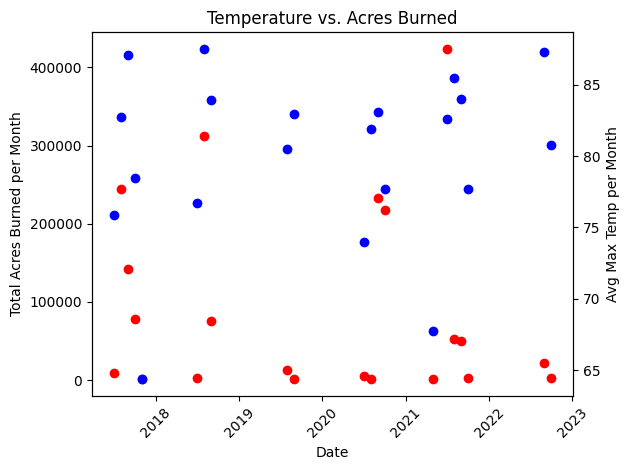

In [118]:
#plt.scatter(weather_fire_grouped["DATE"], weather_fire_grouped["TAVG"])
#plt.scatter(weather_fire_grouped["DATE"], weather_fire_grouped["EstTotalAcres"])
#plt.xticks(rotation=45)

fig, ax = plt.subplots()
ax2 = ax.twinx()

ax.scatter(large_fires["DATE"], large_fires["EstTotalAcres"], color = "r")
ax2.scatter(large_fires["DATE"], large_fires["TMAX"], color = "b") #https://www.geeksforgeeks.org/how-to-add-a-y-axis-label-to-the-secondary-y-axis-in-matplotlib/, secondary axis

#ax.set_xticklabels(ax.get_xticks(), rotation=45) # https://www.geeksforgeeks.org/how-to-rotate-x-axis-tick-label-text-in-matplotlib/, 
ax.tick_params(axis="x", labelrotation=45)

ax.set_xlabel("Date")
ax.set_ylabel("Total Acres Burned per Month")
ax2.set_ylabel("Avg Max Temp per Month")

plt.title("Temperature vs. Acres Burned")

plt.tight_layout()

plt.savefig("Adam/graph_images/fig1.png")

plt.show()

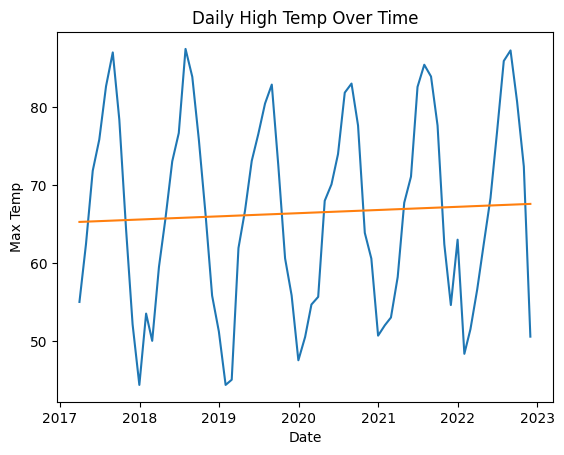

0.03406256562228833


In [119]:
plt.plot(weather_fire_monthly["DATE"], weather_fire_monthly["TMAX"])

dates = np.arange(weather_fire_monthly["DATE"].size) # https://ishan-mehta17.medium.com/simple-linear-regression-fit-and-prediction-on-time-series-data-with-visualization-in-python-41a77baf104c, referenced for how to convert date to float for linregress

corr_slope, corr_int, corr_r, corr_p, corr_std_err = st.linregress(dates, weather_fire_monthly["TMAX"])
corr_fit = dates * corr_slope + corr_int

#plt.scatter(x, y)
plt.plot(weather_fire_monthly["DATE"], corr_fit)

plt.title("Daily High Temp Over Time")
plt.xlabel("Date")
plt.ylabel("Max Temp")

#plt.text(dates.min(), 70, f"{corr_slope}", horizontalalignment="center", verticalalignment="center")

plt.savefig("Adam/graph_images/lin_regress1.png")

plt.show()

print(corr_slope)

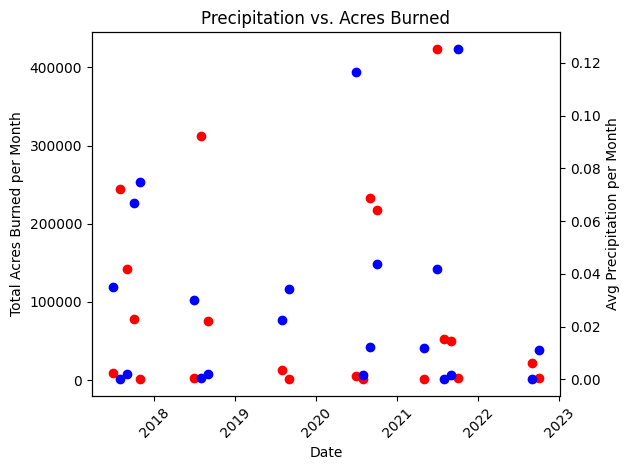

In [120]:
fig, ax = plt.subplots()
ax2 = ax.twinx()

ax.scatter(large_fires["DATE"], large_fires["EstTotalAcres"], color = "r")
ax2.scatter(large_fires["DATE"], large_fires["PRCP"], color = "b") #https://www.geeksforgeeks.org/how-to-add-a-y-axis-label-to-the-secondary-y-axis-in-matplotlib/, secondary axis

#ax.set_xticklabels(ax.get_xticks(), rotation=45) # https://www.geeksforgeeks.org/how-to-rotate-x-axis-tick-label-text-in-matplotlib/, 
ax.tick_params(axis="x", labelrotation=45)

ax.set_xlabel("Date")
ax.set_ylabel("Total Acres Burned per Month")
ax2.set_ylabel("Avg Precipitation per Month")

plt.title("Precipitation vs. Acres Burned")

plt.tight_layout()

plt.savefig("Adam/graph_images/fig2.png")

plt.show()

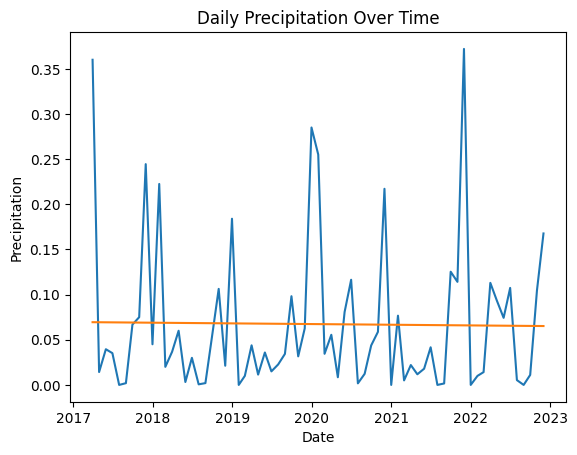

-6.252780739403874e-05


In [121]:
plt.plot(weather_fire_monthly["DATE"], weather_fire_monthly["PRCP"])

dates = np.arange(weather_fire_monthly["DATE"].size)

corr_slope, corr_int, corr_r, corr_p, corr_std_err = st.linregress(dates, weather_fire_monthly["PRCP"])
corr_fit = dates * corr_slope + corr_int

#plt.scatter(x, y)
plt.plot(weather_fire_monthly["DATE"], corr_fit)

plt.title("Daily Precipitation Over Time")
plt.xlabel("Date")
plt.ylabel("Precipitation")

plt.savefig("Adam/graph_images/lin_regress2.png")

plt.show()

print(corr_slope)

In [122]:
temp_corr_coe = round(st.pearsonr(weather_fire_monthly["TMAX"], weather_fire_monthly["EstTotalAcres"])[0], 2)
print(temp_corr_coe)
precip_corr_coe = round(st.pearsonr(weather_fire_monthly["PRCP"], weather_fire_monthly["EstTotalAcres"])[0], 2)
print(precip_corr_coe)

0.46
-0.2
